In [22]:
%matplotlib inline
import difflib
import sys
import pandas as pd
import numpy as np
import seaborn as sbn
import os
import random
import matplotlib.pyplot as plt
sbn.set()

In [32]:
rootDir = os.popen("pwd").read()[:-1]
dataPath = rootDir+"/finalRegions.csv"
data = pd.read_csv(dataPath,names=["Transcript","Tissue","Sample","sf","cov","tpm"])

In [55]:
data['Pair'] = data['Transcript']+data["Tissue"]

In [56]:
data

,Transcript,Tissue,Sample,sf,cov,tpm,Pair
0,LOC103344931,SRR808614,0,0.1,2.917931,8.590482,LOC103344931 SRR808614
1,LOC103344931,SRR808614,1,0.1,2.753581,8.441985,LOC103344931 SRR808614
2,LOC103344931,SRR808614,2,0.1,4.677603,14.173253,LOC103344931 SRR808614
3,LOC103344931,SRR808614,3,0.1,3.075469,9.351865,LOC103344931 SRR808614
4,LOC103344931,SRR808614,4,0.1,2.812839,8.462434,LOC103344931 SRR808614
5,LOC103344931,SRR808614,0,0.2,5.514958,8.444655,LOC103344931 SRR808614
6,LOC103344931,SRR808614,1,0.2,7.131750,10.895000,LOC103344931 SRR808614
7,LOC103344931,SRR808614,2,0.2,4.961060,7.527502,LOC103344931 SRR808614
8,LOC103344931,SRR808614,3,0.2,6.784952,10.356618,LOC103344931 SRR808614
9,LOC103344931,SRR808614,4,0.2,6.759760,10.156561,LOC103344931 SRR808614


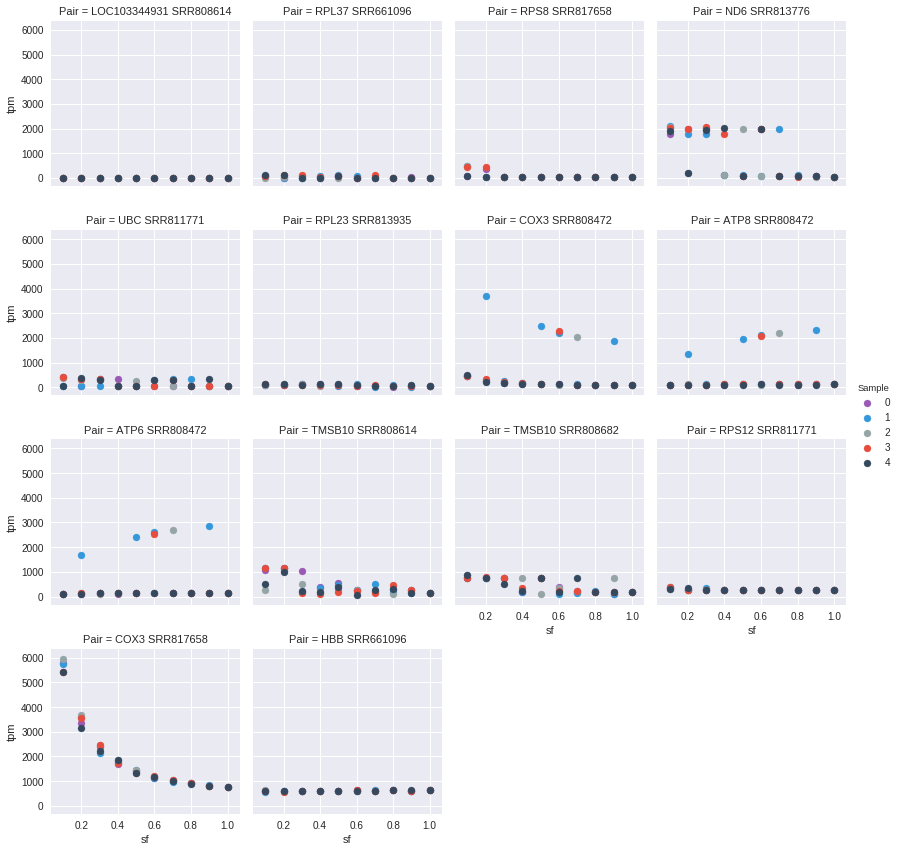

In [57]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
g = sbn.FacetGrid(data, col="Pair", palette=flatui,hue='Sample', col_wrap=4)
g = (g.map(plt.scatter,"sf","tpm").add_legend())